# **Receipt Image and PDF Processing**

In [1]:
path = '../documentations and prior code/Team Project/'

In [2]:
import sys
sys.path.append(path)

# Required Packages Installation

**Note: Must restart runtime after all installations are done.**

In [3]:
! python3 -m spacy download en_core_web_lg
! python3 -m pip install paddlepaddle
! pip3 install paddleocr
! pip3 install borb==2.0.27
! pip3 install pytesseract
! pip3 install ftfy
! pip3 install tesseract
! sudo apt install tesseract-ocr
! pip install keras-ocr
! python3 -m pip install spacy

     |████████████████████████████████| 587.7 MB 28 kB/s  eta 0:00:01     |█████████                       | 164.0 MB 1.0 MB/s eta 0:06:53     |██████████▏                     | 186.7 MB 903 kB/s eta 0:07:24     |███████████▎                    | 206.5 MB 982 kB/s eta 0:06:29     |███████████▎                    | 207.3 MB 982 kB/s eta 0:06:28     |████████████▋                   | 231.1 MB 956 kB/s eta 0:06:13     |██████████████▉                 | 272.5 MB 964 kB/s eta 0:05:27     |███████████████▋                | 287.5 MB 938 kB/s eta 0:05:21     |███████████████▊                | 288.3 MB 938 kB/s eta 0:05:20     |█████████████████████████▍      | 467.0 MB 858 kB/s eta 0:02:21     |█████████████████████████████   | 533.9 MB 897 kB/s eta 0:01:00     |████████████████████████████████| 587.7 MB 907 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     |████████████████████████████████| 40.3 MB 9.9 MB/s eta 0:00:011e

     |████████████████████████████████| 389 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 248 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.0 MB 3.4 MB/s eta 0:00:012
     |████████████████████████████████| 948 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.5 MB 582 kB/s eta 0:00:01
     |████████████████████████████████| 881 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 38.9 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 208 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 399 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████|

  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562571 sha256=ebc14c229fdee7e6eb69284f02843d64061ce811796a88d0e05085e3fd7b9ef9
  Stored in directory: /Users/pritiranjansahoo/Library/Caches/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract
Password:
sudo: a password is required
     |████████████████████████████████| 41 kB 563 kB/s  eta 0:00:01
     |████████████████████████████████| 9.5 MB 774 kB/s eta 0:00:01
^C
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/Users/pritiranjansahoo/miniforge3/envs/tf_legion2.0/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/pritiranjansahoo/miniforge3/envs/tf_legion2.0/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/pritiranjansahoo/miniforge3/envs/tf_legion2.0/lib/python3.10/site-packages/pip/__main__.py", line 31, in <mod

# Preprocessing

### Tesseract approach functions

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import pytesseract
from PIL import Image
import imutils
from imutils.perspective import four_point_transform
##cropping
import argparse
import re

In [ ]:
# Path of working folder on Disk
src_path = ""

def showimage(title, image):
  print(title)
  cv2_imshow(image)

def getString(img):
    # result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))
    result = pytesseract.image_to_string(img, lang = 'eng', config='--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789')
    return result

def processImage(img_path, show=0):
    # Read image with opencv
    img = cv2.imread(img_path)
    img, arraytoPrint = croppingImage(img)

    # showimage('crop', img)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15,11)

    # output = cv2.resize(img, None, fx=0.3,fy=0.3)
    # 1 arraytoPrint.append(['Threshold',img])
    #1 showimage('x0', output)
    if show==1:
      v = printImages(arraytoPrint)
    # print(arraytoPrint)
    return img

def croppingImage(img):
    arraytoPrint = []

    orig = img
    image = orig.copy()


#=
    input_width = int(image.shape[1]/2)
    input_height = int(image.shape[0]/2)
    image = cv2.resize(image, (input_width, input_height))
    orig_image = image.copy()
#=

    ratio = orig.shape[1] / float(image.shape[1])

    # convert the image to grayscale, blur it, and apply edge detection
    # to reveal the outline
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 1)

    # Detect white regions
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    dilated = cv2.dilate(blurred, rectKernel)
    
    #edge
    edged = cv2.Canny(blurred, 30, 150)

#=
    for i in range(input_height):
        if (i != 0) & (i != input_height-1):
            edged[i,0] = 255
            edged[i,input_width-1] = 255
        if (i == 0) | (i == input_height-1):
            edged[i,] = np.repeat(255, input_width)
#=

    # detect contours in the edge map, sort them by size (in descending
    # order), and grab the largest contours
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    # initialize a contour
    imageCnt = None

    # loop over the contours
    for c in cnts:
      # approximate the contour
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.05 * peri, True)
 
      # Evaluating area of approx
      a_list = []
      b_list = []
      for i in approx:
          a = i[0][0]
          b = i[0][1]
          a_list.append(a) 
          b_list.append(b)
      area = (max(a_list) - min(a_list)) * (max(b_list) - min(b_list))
      # 
      if (len(approx) == 4) & (area < 0.99*(input_height-1)*(input_width-1)):
          if area >= 10000: 
              imageCnt = approx
              break
          if area < 10000:
              imageCnt = np.array([[[input_width-1, 0]], [[0, 0]], [[0, input_height-1]], [[input_width-1, input_height-1]]], dtype = 'int32')

    output = image.copy()
    cv2.drawContours(output, [imageCnt], -1, (0, 255, 0), 2)
    output = cv2.resize(output, None, fx=0.3,fy=0.3)
    arraytoPrint.append(['Outline/Borders',output])

    cropped = four_point_transform(image, imageCnt.reshape(4, 2))
    # show transformed image
    output = cv2.resize(cropped, None, fx=0.3,fy=0.3)

    arraytoPrint.append(['Cropped',output])
    #1 showimage("cropped", output)
    #  cv2.waitKey(0)
    return cropped, arraytoPrint



In [ ]:
def printImages(arraytoPrint, factor=0.4):

  import cv2
  import numpy as np
  #new horizontal image array
  Himage = []

  #setting
  width = int(round(420 * factor,0))
  height = int(round(654 * factor,0))
  dim = (width, height)

  font = cv2.FONT_HERSHEY_SIMPLEX
  #iterate similar images
  for title, file in arraytoPrint:
    # print(title)
    # print(file)

    img = file.copy() #cv2.imread(path + 'files/jpg/' + filename)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    cv2.putText(img, title , (20,20), font, 0.4, (0, 0, 255), 1, cv2.LINE_AA)
    Himage.append(img)

  #stack the images
  numpy_horizontal = np.hstack(list(Himage))

  showimage('Outcome: ', numpy_horizontal)

  cv2.waitKey()

###Extracting Text

--- Start processing the image ---
Outcome: 


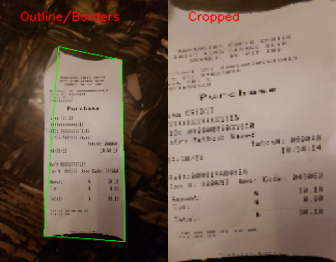

In [ ]:
print ('--- Start processing the image ---')
jpg_path = path+'files/jpg/'

imgnumber = '39'

img = processImage(jpg_path + imgnumber + '.jpg',1 )

In [ ]:
print ('.= extracting Text from cropped image using Tesseract =.')
print('-'*60)
text = getString(img)
print (text)
print('-'*60)

.= extracting Text from cropped image using Tesseract =.
------------------------------------------------------------
'
~
weace ee 4
efits nse ate
Suereys O° yar 2#e |
nant 122 “ onsn0seen |
oa pae23094 |
fy wet
assent
purchas?
sa CREONT
cp PH LEASES
10: gn030031 618
ntrt Hethod? Haved
Batch: gatads
430728 fer59214
pet 0004484084
Inv qoaegT Aer Code? 049060
faount? $ 30
18
Tet : 0.09
Total: yo me
vqva gy wwe

------------------------------------------------------------


In [ ]:
#using original image to compare
img = cv2.imread(jpg_path + imgnumber + '.jpg')
print ('.= extracting Text from original image using Tesseract =.')
print('-'*60)
text = getString(img)
print (text)
print('-'*60)


.= extracting Text from original image using Tesseract =.
------------------------------------------------------------
_
a,
*
: B: MAHAVEERS CHEFS CHOICE
- 1 ( KING GEORGE BLVD
4 SURREY, BC V3T 2N6 :
, Nerchant ID: 868000005648419 a
; erm ID: 084623094
Clerk thi 4
25981656018
Purchase
B Visa CREDIT :
Me OXAXXKHAXXKKXL315
AID: AGOABOROO31010
Entry Method: Waved
Batch: (00048
04730720 18:58:14
Refit: 000014484064
Inv : 000697 Appr Code: 049068
Anount: $ 30,18
a Tip: $ 0.00
Total: _
IVR: 00 O86 BO BG BO a
[Sl:66 oo is hes ne
i
oo.
Customer Copy ae

------------------------------------------------------------


## KERAS approach

In [ ]:
import keras_ocr 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
images = [
    keras_ocr.tools.read(url) for url in [
        jpg_path +'39.jpg'
    ]
  ]
prediction_groups = pipeline.recognize(images)

In [ ]:
predicted_image_1 = prediction_groups[0]
for text, box in predicted_image_1:
  print(text)

choice
mahaveers
chefs
10227
blvd
king
orge
ge
216
surrey
v31
bc
csonossabll
merchant
ide
teton
ida
94823694
clerk
ids
1
25a816s001e
purchase
credit
visa
xxxxxxxxx1s
abggn16
aids
entry
methoda
waved
jigga8
batchth
18158611
93120
reftsgo1841694
0967
041060
coder
appr
inv
hi
30
18
amount
tip
o0
d
lotall
30
18
vra
oo
00
ud
00
uu
isi
9o
00
s
custoner
copy


## New processing: Looking for groups using OpenCV

#### Inverting colors - Threshold - Dilate - Groups

In [ ]:
def getThreshold(im):
  _, binary_thresh = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY_INV)

  fig = plt.figure(figsize=(12, 12))
  fig.add_subplot(1, 4, 1)
  plt.imshow(im)

  fig.add_subplot(1, 4, 2)
  plt.imshow(binary_thresh)

  vis = cv2.cvtColor(im,cv2.COLOR_GRAY2RGB)

  neg = cv2.bitwise_not(im)
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
  dilate = cv2.morphologyEx(neg, cv2.MORPH_DILATE, kernel)
  connected = cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel, iterations=1)
  contours, hierarchy = cv2.findContours(connected, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  boxes = map(lambda c: cv2.boundingRect(c), contours)
  filtered = filter(lambda b: b[2] > 20 and b[3] > 25, boxes)

  for (x, y, w, h) in filtered:
      cv2.rectangle(vis, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

  # plt.figure(figsize=( 8, 8))
  fig.add_subplot(1, 4, 3)
  plt.imshow(dilate)
  fig.add_subplot(1, 4, 4)
  plt.imshow(vis)


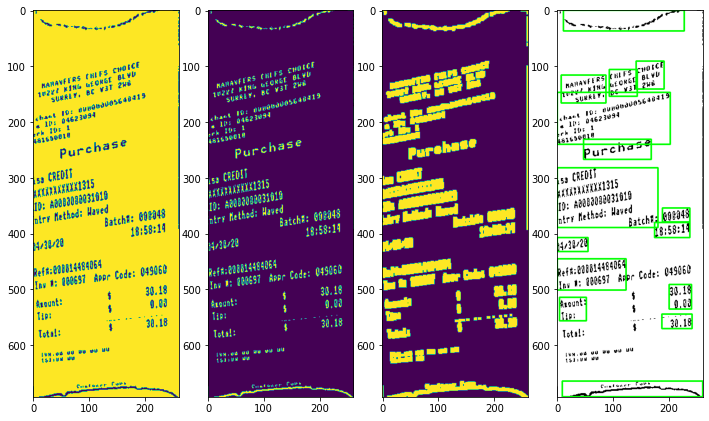

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

filename = imgnumber + '.jpg'
im = processImage(jpg_path + filename, show=0)
getThreshold(im)
# im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


##  New OCR: Paddle

### Importing libraries and model initialization

In [ ]:
#!python3 -m pip install paddlepaddle-gpu

In [ ]:
#!pip3 install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl

In [ ]:
from matplotlib import pyplot as plt
import os
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies

In [ ]:
def getPaddle(img_path):
  ocr_model_1 = PaddleOCR(lang='en')

  %matplotlib inline
  result = ocr_model_1.ocr(img_path)
  # Extracting detected components
  boxes = [res[0] for res in result] # 
  texts = [res[1][0] for res in result]
  scores = [res[1][1] for res in result]

  # imports image
  img = cv2.imread(img_path) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

  font_path = os.path.join(path, 'fonts/', 'latin.ttf')
  # Visualize our image and detections
  plt.figure(figsize=(18,18))

  # draw annotations on image
  annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 
  plt.imshow(annotated) 



### Model execution

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3.86M/3.86M [00:18<00:00, 214kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:24<00:00, 408kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 1.45M/1.45M [00:12<00:00, 117kiB/s]

[2022/08/07 17:37:17] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

[2022/08/07 17:37:17] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/08/07 17:37:18] ppocr DEBUG: dt_boxes num : 28, elapse : 0.6968448162078857
[2022/08/07 17:37:22] ppocr DEBUG: rec_res num  : 28, elapse : 4.36899995803833


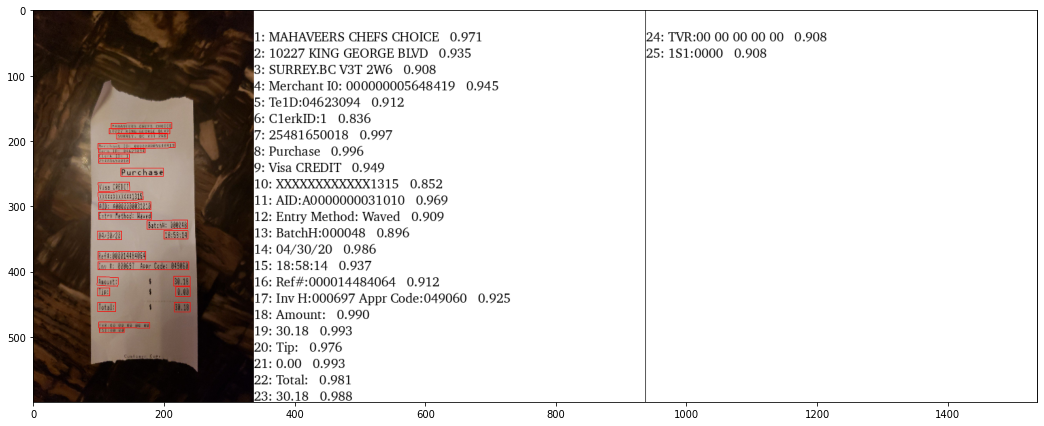

In [ ]:
filename = imgnumber + '.jpg'
img_path = jpg_path + filename
getPaddle(img_path)

### Libraries comparison

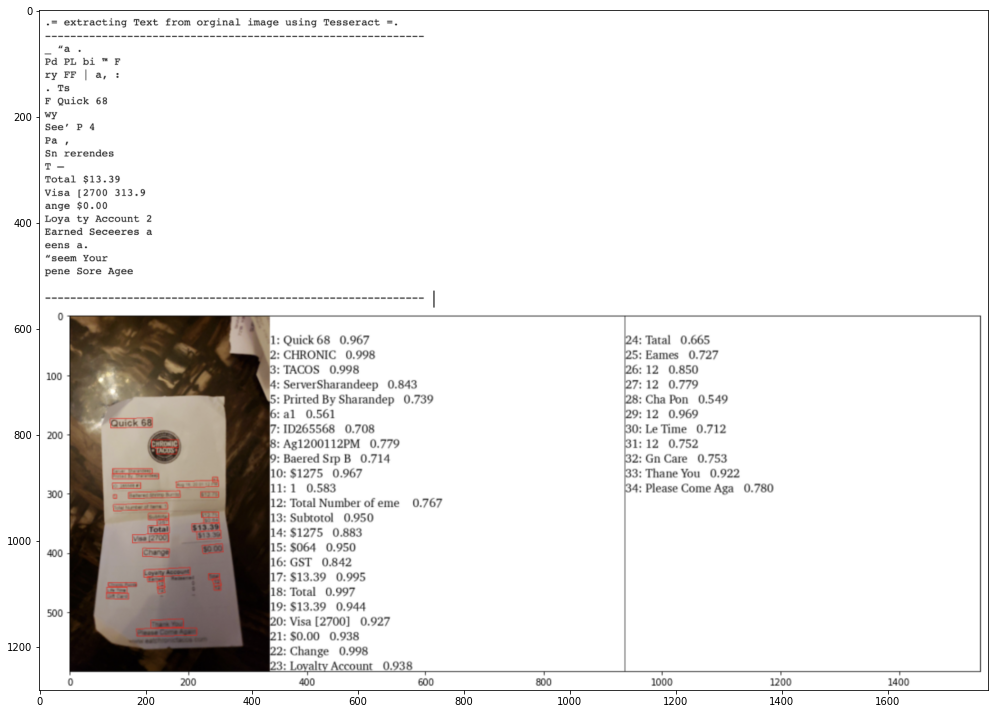

In [ ]:
#image comparison file 17.jpg
img = cv2.imread(path + 'tvsp.png')
# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.figure(figsize=(17,17))
plt.imshow(img) 
# showimage("VS", img)

# Training Data

## Functions to Extract Training Data

In [12]:
# Importing required libraries
import os
import re
from borb.pdf.document.document import Document
import typing
from borb.pdf.pdf import PDF
from borb.toolkit.text.simple_text_extraction import SimpleTextExtraction
from borb.toolkit.ocr.ocr_as_optional_content_group import OCRAsOptionalContentGroup
from pathlib import Path
import ftfy
import unicodedata
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import pandas as pd

/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):


In [13]:
#address_re_pattern = r'Picked up from\n(.*), (.*), ([A-Z]{2}) ([A-Z0-9]{3} [A-Z0-9]{3}), ([a-zA-Z]+)\s'

In [14]:
def loadInvoicesFromDir(directory: str = 'files/pdf'):
    print("loading invoices from", directory)
    subDirectories = os.listdir(directory)
    invoices = dict()
    # invoices['files/uber/2020-12-19 - uber-eats.pdf'] = 'uber'

    for subdir in subDirectories:
        path = f'{directory}/{subdir}'
        if not os.path.isdir(path):
            continue
        files = os.listdir(path)
        for file in files:
            if not file.lower().endswith('.pdf'):
                continue
            filename = f'{path}/{file}'
            invoices[filename] = subdir

    return getInvoicesData(invoices)

In [15]:
def getInvoicesData(invoices):
    data = []
    for invoice, type in invoices.items():
        print('Extracting info from invoice:', invoice)
        if type == 'uber':
            invoiceInfo = getUberInvoiceInfo(invoice)
        elif type == 'doordash':
            invoiceInfo = getDoordashInvoiceInfo(invoice)
        elif type == 'bestbuy':
            invoiceInfo = getBestbuyInvoiceInfo(invoice)
        elif type == 'canadacomputers':
            invoiceInfo = getCanadaComputersInvoiceInfo(invoice)
        elif type == 'boltbus':
            invoiceInfo = getBoltbusInvoiceInfo(invoice)
        elif type == 'pcloud':
            invoiceInfo = getPcloudInvoiceInfo(invoice)
        elif type == 'zoom':
            invoiceInfo = getZoomInvoiceInfo(invoice)


        else:
            invoiceInfo = {
                'filename': '',
                'text': '',
                'date': '',
                'dateStartIndex': '',
                'dateEndIndex': '',
                'businessName': '',
                'businessStartIndex': '',
                'businessEndIndex': '',
                'total': '',
                'totalStartIndex': '',
                'totalEndIndex': ''
                # 'city': '',
                # 'province': '',
                # 'postalCode': ''
            }
        data.append(invoiceInfo)
    return data

In [16]:
def getUberInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = getInvoiceText(invoice)
    date = findInText(r'(\S+\s\d+,\s\d+)', text)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = findInText(
        r"You ordered from (.*?)\n", text, group = 1)
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'Total (CA\$\d+\.\d+)', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = findInText(
    #    address_re_pattern, text, group = 2)
    # province = findInText(
    #     address_re_pattern, text, group = 3)
    # postalCode = findInText(
    #     address_re_pattern, text, group = 4)

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [17]:
def getDoordashInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = getInvoiceText(invoice)
    date = findInText(r'Delivery: \w* (\w* \d*)', text, group = 1)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = findInText(
       r"Thanks for your order, \w*\s([^\(]*) ", text, group = 1)
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'Total (\$\d+.\d+)', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = findInText(
    #     text, r"\(([^\)]+)", 1)
    # province = ''
    # postalCode = ''

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [18]:
def getBestbuyInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = getInvoiceText(invoice)
    date = findInText(r'Order Date: (\d*-\w*-\d*)', text, group = 1)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = "Best Buy Canada"
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'Order Total: (\$\d+.\d+)', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = ''
    # province = ''
    # postalCode = ''

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [19]:
def getCanadaComputersInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = unicodedata.normalize("NFKD", getInvoiceTextOCR(invoice))
    date = findInText(r'SO Date:(.*)\n', text, group = 1)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = findInText(
        r"INVOICE\n(.*)\n", text, group = 1)
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'Total:(\$\d+.\d+)', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = findInText(text, r'(.*), (.*), ([A-Z]{2}) ([A-Z0-9]{3} [A-Z0-9]{3})\n',2)
    # province = findInText(text, r'(.*), (.*), ([A-Z]{2}) ([A-Z0-9]{3} [A-Z0-9]{3})\n',3)
    # postalCode = findInText(text, r'(.*), (.*), ([A-Z]{2}) ([A-Z0-9]{3} [A-Z0-9]{3})\n',4)

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [20]:
def getBoltbusInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = getInvoiceText(invoice)
    date = findInText(r'> \w+, (\w+ \d+, \d+)', text, group = 1)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = findInText(
        r"Thank you for choosing (\w+)", text, group = 1)
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'Total (\$\d+.\d+)', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = ''
    # province = ''
    # postalCode = ''

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [21]:
def getPcloudInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = unicodedata.normalize("NFKD", getInvoiceText(invoice))
    date = findInText(r'Date:  (\d+.\d+.\d+)', text, group = 1)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = findInText(
        r"Supplier\n(\w+)\n", text, group = 1)
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'USD\n(\d+.\d+ [A-Z]{3})\n', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = ''
    # province = ''
    # postalCode = ''

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [22]:
def getZoomInvoiceInfo(invoice):
    filename = invoice.split('/')[-1]
    text = getInvoiceText(invoice)
    date = findInText(r'Account Information:\n(\d{2}\/\d{2}\/\d{4})', text, group = 1)
    dateStartIndex = text.find(date)
    dateEndIndex = text.find(date) + len(date)
    bussinessName = "Zoom Video Communications Inc."
    businessStartIndex = text.find(bussinessName)
    businessEndIndex = text.find(bussinessName) + len(bussinessName)
    total = findInText(r'Invoice Total (CAD\d+.\d+)', text, group = 1)
    totalStartIndex = text.find(total)
    totalEndIndex = text.find(total) + len(total)
    # city = ''
    # province = ''
    # postalCode = findInText(text,r'CA (\d+)',1)

    return {
        'filename': filename,
        'text': text,
        'date': date,
        'dateStartIndex':dateStartIndex,
        'dateEndIndex': dateEndIndex,
        'businessName': bussinessName,
        'businessStartIndex':businessStartIndex,
        'businessEndIndex':businessEndIndex,
        'total': total,
        'totalStartIndex': totalStartIndex,
        'totalEndIndex': totalEndIndex
        # 'city': city,
        # 'province': province,
        # 'postalCode': postalCode
    }

In [23]:
def getInvoiceText(filename: str):
    d: typing.Optional[Document] = None
    l: SimpleTextExtraction = SimpleTextExtraction()
    with open(filename, "rb") as pdf_in_handle:
        d = PDF.loads(pdf_in_handle, [l])

    assert d is not None

    invoiceText: str = ''
    page = 0
    reading = True
    while reading:
        pageText = l.get_text_for_page(page)
        invoiceText += pageText
        if pageText == '':
            reading = False
        page += 1
    return ftfy.fix_text(invoiceText)

In [24]:
def getInvoiceTextOCR(filename: str):
    tesseract_data_dir: Path = Path(path + "tessdata")
    assert tesseract_data_dir.exists()
    l: OCRAsOptionalContentGroup = OCRAsOptionalContentGroup(
        tesseract_data_dir)

    d: typing.Optional[Document] = None
    with open(filename, "rb") as pdf_in_handle:
        d = PDF.loads(pdf_in_handle, [l])

    assert d is not None

    ocrFilename = 'ocr.pdf'
    with open(ocrFilename, "wb") as pdf_file_handle:
        PDF.dumps(pdf_file_handle, d)

    text = getInvoiceText('ocr.pdf')
    os.remove(ocrFilename)

    return text

In [25]:
def findInText(pattern, text, flags=0, group=0):
    match = re.search(pattern, text, flags)
    if match:
        return match.group(group)
    return ''

In [26]:
def loadImagesFromjpg(directory: str = 'files/jpg'):
    print("loading invoices from", directory)
    subDirectories = os.listdir(directory)
    images = dict()
    for subdir in subDirectories:
        path = f'{directory}/{subdir}'
        if not os.path.isdir(path):
            continue
        files = os.listdir(path)
        for file in files:
            if not file.endswith('.jpg'):
                continue
            filename = f'{path}/{file}'
            images[filename] = subdir

    return getImgData(images)

In [27]:
def getImgText(filename: str):
  ocr_model = PaddleOCR(lang='en', show_log=False)
  sentence = ''
  result = ocr_model.ocr(filename)
  for res in result:
      sentence += res[1][0] + '\n'
  sentence = sentence[:len(sentence)]
  return sentence

In [28]:
def getImgTotal(receipt_text):
  patterns = [
    (r'\s(?:payable):?\s?((?:CA)??\$?\d+.\d+)',1, re.IGNORECASE),
    (r'\n(?:(?:here )?total|totaldue|paid|tl|cash|Tctal|Totai):?\s?((?:CA)?(?:DS)?\$?\d+.\d+)',1, re.IGNORECASE),
    (r'\n(?:amount):?\s?((?:CA)??\$?\d+.\d+)',1, re.IGNORECASE),
    (r'(\$?\d+.\d+)\s(?:amount|total)', 1, re.IGNORECASE)
  ]
  total = None
  for pattern, group, flag in patterns:
    total = findInText(pattern, receipt_text, flag, group)
    if len(total) > 0:
      break
  return total

In [29]:
def getImgDate(receipt_text):
  patterns = [
    # "Jan 21,20", "Jan 21,2020", "Jan 21 20", "Jan 21, 2020", "Jan 21, 20"
    #  "Jan 21.20", "Jan 21.2020", "Jan 21. 2020", "Jan 21. 20"
    (r"((?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)\s?[0-9]{1,2}(?:,|\.|\s)\s?[0-9]{2,4})\s", 1, re.IGNORECASE),
    # "11/27/19", "12/14/2019", "2020-01-07", "20-01-2017"
    (r'([0-9]{1,4}(?:-|\/)[0-9]{1,2}(?:-|\/)[0-9]{1,4})', 1, 0),
    # "20-Jun-2020"
    (r'([0-9]{1,4}(?:-|\/| )(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec)(?:-|\/| )[0-9]{1,4})', 1, re.IGNORECASE)
  ]
  date = None
  for pattern, group, flags in patterns:
    date = findInText(pattern, receipt_text, flags, group)
    if len(date) > 0:
      break
  return date

In [30]:
def getImgData(images):
    data = []
    for image, type in images.items():
        print('Extracting info from image:', image)
        filename = image.split('/')[-1]
        text = getImgText(image)
        total = getImgTotal(text)
        totalStartIndex = text.find(total)
        totalEndIndex = text.find(total) + len(total)
        date = getImgDate(text)
        dateStartIndex = text.find(date)
        dateEndIndex = text.find(date) + len(date)

        if type == '1': # Name in first line
            businessName = text.split('\n')[0]
            businessStartIndex = text.find(businessName)
            businessEndIndex = text.find(businessName) + len(businessName)
        elif type == '1-2': # Name in first and second line
            businessName = text.split('\n')[0] + ' ' + text.split('\n')[1]
            businessStartIndex = text.find(businessName.split(' ')[0])
            businessEndIndex = text.find(businessName.split(' ')[0]) + len(businessName)
        elif type == '2': # Name in second line
            businessName = text.split('\n')[1]
            businessStartIndex = text.find(businessName)
            businessEndIndex = text.find(businessName) + len(businessName)
        elif type == '2-3': # Name in second and third line
            businessName = text.split('\n')[1] + ' ' + text.split('\n')[2]
            businessStartIndex = text.find(businessName.split(' ')[0])
            businessEndIndex = text.find(businessName.split(' ')[0]) + len(businessName)
        elif type == '3': # Name in third line
            businessName = text.split('\n')[2]
            businessStartIndex = text.find(businessName)
            businessEndIndex = text.find(businessName) + len(businessName)
        elif type == '5-down': # Name 5 lines down
            businessName = text.split('\n')[4]
            businessStartIndex = text.find(businessName)
            businessEndIndex = text.find(businessName) + len(businessName)
        elif type == '5-up': # Name 5 lines up
            businessName = text.split('\n')[-6]
            businessStartIndex = text.find(businessName)
            businessEndIndex = text.find(businessName) + len(businessName)
        else: # No name
            businessName = ''
            businessStartIndex = ''
            businessEndIndex = ''
        
        invoiceInfo = {
            'filename': filename,
            'text': text,
            'date': date,
            'dateStartIndex': dateStartIndex,
            'dateEndIndex': dateEndIndex,
            'businessName': businessName,
            'businessStartIndex': businessStartIndex,
            'businessEndIndex': businessEndIndex,
            'total': total,
            'totalStartIndex': totalStartIndex,
            'totalEndIndex': totalEndIndex
        }
        data.append(invoiceInfo)
        
    return data

## Extracting Training Data

In [ ]:
# extracting info from PDF invoices to create training dataset
pdf_data = loadInvoicesFromDir(path + 'files/pdf')

loading invoices from /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/pdf
Extracting info from invoice: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/pdf/uber/2021-01-22 - uber-eats.pdf
Extracting info from invoice: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/pdf/uber/Jan 30 2021.pdf
Extracting info from invoice: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/pdf/uber/2020-09-24 - dragon-wok.pdf
Extracting info from invoice: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/pdf/uber/Feb 04 2021.pdf
Extracting info from invoice: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/pdf/uber/receipt_d9baf342-ef43-50d9-a059-fa3cbbbf5384.pdf
Extracting info from invoice: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Proj

In [ ]:
pdf_data

[{'businessEndIndex': 85,
  'businessName': 'Spice of Nepal',
  'businessStartIndex': 71,
  'date': 'January 22, 2021',
  'dateEndIndex': 16,
  'dateStartIndex': 0,
  'filename': '2021-01-22 - uber-eats.pdf',
  'text': "January 22, 2021\nThanks for ordering, Anindita\nHere's your receipt for Spice of Nepal.\nTotal CA$27.28\n1 Butter Chicken Momo (Steamed or Deep-Fried) CA$12.99\n Choose your spice level  Medium CA$0.00\n Choose your preparation  Deep-fried CA$0.00\n1 Chili Chicken Momo CA$12.99\n Choose your spice level  Medium CA$0.00\n Choose your preparation  Deep-fried CA$0.00\nSubtotal CA$25.98\nService Fee CA$2.60\nDelivery Fee CA$2.99\nDelivery Discount -CA$2.99\nDiscount -CA$1.30\nYou ordered from Spice of Nepal\nPicked up from\n13490 72 Ave, Surrey, BC V3W 2N8, Canada\nDelivered to\n9838 Whalley Blvd, Surrey, BC V3T 5S8, Canada",
  'total': 'CA$27.28',
  'totalEndIndex': 101,
  'totalStartIndex': 93},
 {'businessEndIndex': 89,
  'businessName': 'A1 Coffee & Donair',
  'busines

In [ ]:
pdf_df = pd.DataFrame(pdf_data)
pdf_df.head()

,filename,text,date,dateStartIndex,dateEndIndex,businessName,businessStartIndex,businessEndIndex,total,totalStartIndex,totalEndIndex
0,2021-01-22 - uber-eats.pdf,"January 22, 2021\nThanks for ordering, Anindit...","January 22, 2021",0,16,Spice of Nepal,71,85,CA$27.28,93,101
1,Jan 30 2021.pdf,"January 30, 2021\nThanks for ordering, Chinmay...","January 30, 2021",0,16,A1 Coffee & Donair,71,89,CA$17.95,97,105
2,2020-09-24 - dragon-wok.pdf,"September 24, 2020\nThanks for ordering, Anind...","September 24, 2020",0,18,Dragon Wok - Indian Style Chinese Food,73,111,CA$36.62,119,127
3,Feb 04 2021.pdf,"February 4, 2021\nThanks for ordering, Chinmay...","February 4, 2021",0,16,One More Thai Restaurant,71,95,CA$29.49,103,111
4,receipt_d9baf342-ef43-50d9-a059-fa3cbbbf5384.pdf,"Visa ••••7860\n12/23/21 11:08 PM\nDecember 23,...","December 23, 2021",32,49,MoMo Factory,105,117,CA$27.80,139,147


In [ ]:
pdf_df.to_csv(path + 'pdf_data.csv')

In [ ]:
print(path +'files/jpg')

/content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/jpg


In [ ]:
# extracting info from JPG invoices to create training dataset
img_data = loadImagesFromjpg(path +'files/jpg')

loading invoices from /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/jpg
Extracting info from image: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/jpg/1/90.jpg
[2022/08/07 17:40:28] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
Extracting info from image: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/jpg/1/75.jpg
[2022/08/07 17:40:42] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
Extracting info from image: /content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/files/jpg/1/64.jpg
[2022/08/07 17:40:51] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
Extracting info from image: /content/drive/MyDri

In [ ]:
img_data

[{'businessEndIndex': 11,
  'businessName': 'SAL Y LIMON',
  'businessStartIndex': 0,
  'date': '11/23/2019',
  'dateEndIndex': 123,
  'dateStartIndex': 113,
  'filename': '90.jpg',
  'text': 'SAL Y LIMON\nUNIT5,701KINGSWAY&FRASER\nVANCOUVER,BC, V5T 3K6\nGST: 80627 5434 RT001\nPH.604-677-4247\nToken : 126\nDate11/23/2019\nTime:0106PMINV#:276648\nStation ID :2\nServer:PEPE CEDENO\nRECEIPT\nTable No:T2\nGuests:2\nPRICE\nITEM\nQTY\nTOTAL\n3.50\nMEXICAN BOTTLE\n3.50\n3.50\nMEXICAN BOTTLE\n3.50\n3.65\nFISH TACOS\n1\n3.65\n*CHEESE0.50\n0.00\n....PLATE-2..\n1\n0.00\n0.00\n0.00\n...PLATE-3...\n1\n0.00\n1\n0.00\n..PLATE-4....\n16.95\n1\nSUPER MARINERA BURRI\n16.95\nTO\n* CHEESE AND GUAC(4\n.00\nCHIMICHANGA(2.00\n116.95\nSUPER MARINERA BURRI\n16.95\nTO\n* CHEESE AND GUAC(4\n.00\n*CHIMICHANGA(2.00)\nSubtotal\n44.55\nGST\n2.24\nPLT\n0.00\nTotal\n46.79\nNet Payable\n46.79\nPAID BYLVISA:46.79\nChange:$0.00\n',
  'total': '46.79',
  'totalEndIndex': 596,
  'totalStartIndex': 591},
 {'businessEndIndex

In [ ]:
img_df = pd.DataFrame(img_data)
img_df.head()

,filename,text,date,dateStartIndex,dateEndIndex,businessName,businessStartIndex,businessEndIndex,total,totalStartIndex,totalEndIndex
0,90.jpg,"SAL Y LIMON\nUNIT5,701KINGSWAY&FRASER\nVANCOUV...",11/23/2019,113,123,SAL Y LIMON,0,11,46.79,591,596
1,75.jpg,Subway#6966-0 Phone 604-498-5444\n100-13479 10...,12/14/2019,498,508,Subway#6966-0 Phone 604-498-5444,0,32,$14.05,223,229
2,64.jpg,BHARAT PARMAR SWEETS &\n13745 72 AVE UNIT\nV3W...,01/20/20,112,120,BHARAT PARMAR SWEETS &,0,22,$14.70,232,238
3,93.jpg,Shawarma Palace\n115-7218 King George Blvd\nSu...,11/17/2019,85,95,Shawarma Palace,0,15,$19.61,194,200
4,100.jpg,BURGER KING\n3341\n10344 King George Highway\n...,Nov 02 2019,245,256,BURGER KING,0,11,12.58,210,215


In [ ]:
img_df.to_csv(path + 'img_data.csv')

### Joining JPG and PDF Data

In [ ]:
# joining PDF and JPG info
data = pdf_data + img_data
#data
len(data)

203

In [ ]:
df = pd.DataFrame(data)
df

,filename,text,date,dateStartIndex,dateEndIndex,businessName,businessStartIndex,businessEndIndex,total,totalStartIndex,totalEndIndex
0,2021-01-22 - uber-eats.pdf,"January 22, 2021\nThanks for ordering, Anindit...","January 22, 2021",0,16,Spice of Nepal,71,85,CA$27.28,93,101
1,Jan 30 2021.pdf,"January 30, 2021\nThanks for ordering, Chinmay...","January 30, 2021",0,16,A1 Coffee & Donair,71,89,CA$17.95,97,105
2,2020-09-24 - dragon-wok.pdf,"September 24, 2020\nThanks for ordering, Anind...","September 24, 2020",0,18,Dragon Wok - Indian Style Chinese Food,73,111,CA$36.62,119,127
3,Feb 04 2021.pdf,"February 4, 2021\nThanks for ordering, Chinmay...","February 4, 2021",0,16,One More Thai Restaurant,71,95,CA$29.49,103,111
4,receipt_d9baf342-ef43-50d9-a059-fa3cbbbf5384.pdf,"Visa ••••7860\n12/23/21 11:08 PM\nDecember 23,...","December 23, 2021",32,49,MoMo Factory,105,117,CA$27.80,139,147
...,...,...,...,...,...,...,...,...,...,...,...
198,88.jpg,"800 Carnavon Street, Unit 230\nNew Westminster...",11/27/19,108,116,,,,$10.49,226,232
199,63.jpg,Quick 08\nInvoiceHeader\nServer:Kai\nPrinted B...,"Jan 21,20",61,70,,,,$11.33,231,237
200,1.jpg,"Store #1715\nSurrey,\nB.C.\nTel. 604-588-2252\...",06/15/21,81,89,,,,$8.40,178,183
201,86.jpg,MERCHANT COY\nManchu\nK\nRef:2865\nTb1:0\nChk:...,11/30/2019,47,57,Manchu K,13,21,12.48,142,147


In [ ]:
df.to_csv(path + 'data.csv')

In [ ]:
import numpy as np
# replace empty strings with missing value
df.replace('', np.nan, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            198 non-null    object 
 1   text                198 non-null    object 
 2   date                186 non-null    object 
 3   dateStartIndex      198 non-null    float64
 4   dateEndIndex        198 non-null    float64
 5   businessName        192 non-null    object 
 6   businessStartIndex  192 non-null    float64
 7   businessEndIndex    192 non-null    float64
 8   total               196 non-null    object 
 9   totalStartIndex     198 non-null    float64
 10  totalEndIndex       198 non-null    float64
dtypes: float64(6), object(5)
memory usage: 17.6+ KB


In [ ]:
# remove all rows with missing businessName, date or total
dfnoNA = df.dropna(subset = ['businessName', 'date', 'total'])
dfnoNA.reset_index(inplace=True, drop=True)

In [ ]:
dfnoNA

,filename,text,date,dateStartIndex,dateEndIndex,businessName,businessStartIndex,businessEndIndex,total,totalStartIndex,totalEndIndex
0,2021-01-22 - uber-eats.pdf,"January 22, 2021\nThanks for ordering, Anindit...","January 22, 2021",0.0,16.0,Spice of Nepal,71.0,85.0,CA$27.28,93.0,101.0
1,Jan 30 2021.pdf,"January 30, 2021\nThanks for ordering, Chinmay...","January 30, 2021",0.0,16.0,A1 Coffee & Donair,71.0,89.0,CA$17.95,97.0,105.0
2,2020-09-24 - dragon-wok.pdf,"September 24, 2020\nThanks for ordering, Anind...","September 24, 2020",0.0,18.0,Dragon Wok - Indian Style Chinese Food,73.0,111.0,CA$36.62,119.0,127.0
3,Feb 04 2021.pdf,"February 4, 2021\nThanks for ordering, Chinmay...","February 4, 2021",0.0,16.0,One More Thai Restaurant,71.0,95.0,CA$29.49,103.0,111.0
4,receipt_d9baf342-ef43-50d9-a059-fa3cbbbf5384.pdf,"Visa ••••7860\n12/23/21 11:08 PM\nDecember 23,...","December 23, 2021",32.0,49.0,MoMo Factory,105.0,117.0,CA$27.80,139.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...
175,76.jpg,** Pick-up time **\n14/12/2019\n11:57 AM\nTake...,14/12/2019,19.0,29.0,Pardesi Sweets & Restaurant,262.0,289.0,$19.95,179.0,185.0
176,49.jpg,** Pick-up **\nTake-Out\n02/17/202006:22 PM\n4...,02/17/2020,23.0,33.0,Pardesi Sweets & Restaurant,208.0,235.0,$12.58,125.0,131.0
177,58.jpg,** Pick-up **\nTake-Out\n02/01/2020 11:05 AM\n...,02/01/2020,23.0,33.0,Pardesi Sweets & Restaurant,237.0,264.0,$23.08,155.0,161.0
178,78.jpg,CK ACKNOWLEDGES RECEIPT\nOODS ANDYOR SERVICES ...,12/09/19,226.0,234.0,SHAWARMA PALACE,98.0,113.0,$9.44,283.0,288.0


In [ ]:
dfnoNA.to_csv(path + 'datanoNA.csv')

In [ ]:
# creating list of annotated examples from invoice text and selected entities
trainingDataSpacy = []
for row in range(len(dfnoNA)):
    text = dfnoNA.iloc[row]['text']
    entities = [(int(dfnoNA.iloc[row]['dateStartIndex']), int(dfnoNA.iloc[row]['dateEndIndex']), 'DATE'),
    (int(dfnoNA.iloc[row]['businessStartIndex']), int(dfnoNA.iloc[row]['businessEndIndex']), 'ORG'), 
    (int(dfnoNA.iloc[row]['totalStartIndex']), int(dfnoNA.iloc[row]['totalEndIndex']), 'MONEY')]
    # print(entities)
    trainingDataSpacy.append((text, entities))

In [ ]:
trainingDataSpacy[0:2]

[("January 22, 2021\nThanks for ordering, Anindita\nHere's your receipt for Spice of Nepal.\nTotal CA$27.28\n1 Butter Chicken Momo (Steamed or Deep-Fried) CA$12.99\n Choose your spice level  Medium CA$0.00\n Choose your preparation  Deep-fried CA$0.00\n1 Chili Chicken Momo CA$12.99\n Choose your spice level  Medium CA$0.00\n Choose your preparation  Deep-fried CA$0.00\nSubtotal CA$25.98\nService Fee CA$2.60\nDelivery Fee CA$2.99\nDelivery Discount -CA$2.99\nDiscount -CA$1.30\nYou ordered from Spice of Nepal\nPicked up from\n13490 72 Ave, Surrey, BC V3W 2N8, Canada\nDelivered to\n9838 Whalley Blvd, Surrey, BC V3T 5S8, Canada",
  [(0, 16, 'DATE'), (71, 85, 'ORG'), (93, 101, 'MONEY')]),
 ("January 30, 2021\nThanks for ordering, Chinmaya\nHere's your receipt for A1 Coffee & Donair.\nTotal CA$17.95\n2 Dinair and Rice CA$14.75\n Choice of Protein  Chicken CA$0.00\n Choice of Ingredients  Lettuce CA$0.00\n Cucumber  CA$0.00  Tomato  CA$0.00\n Onion CA$0.00  Tabbouleh CA$0.00\n Choice of Sauce

In [ ]:
len(trainingDataSpacy)

180

In [ ]:
train_examples = round(4*len(trainingDataSpacy)/5)

In [ ]:
#Splitting data into training and testing 
import random
random.seed(234)
#Using 80% of receipts as training data  
ratio = 4*(len(trainingDataSpacy)/5)
training_data = random.sample(trainingDataSpacy,train_examples)
testing_data = [example for example in trainingDataSpacy if example not in training_data]

# training_data

In [ ]:
len(training_data)

144

In [ ]:
len(testing_data)

29

In [3]:
%cd '/content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project/'

/content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project


In [4]:
! pwd

/content/drive/MyDrive/PDD - Data Analytics/3 - Summer 2022/CPSC 4830/Team Project


# Spacy Named Entity Recognition Model

In [5]:
import spacy
from spacy.tokens import DocBin

In [ ]:
nlp = spacy.blank("en")

# creating Spacy training data with annotated examples
db = DocBin()
for text, annotations in training_data:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations:
        span = doc.char_span(start, end, label=label, alignment_mode='expand')
        ents.append(span)
    doc.ents = ents
    db.add(doc)
db.to_disk("./train.spacy")

# creating Spacy testing data with annotated examples
test_db = DocBin()
for text, annotations in testing_data:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations:
        span = doc.char_span(start, end, label=label, alignment_mode='expand')
        ents.append(span)
    doc.ents = ents
    test_db.add(doc)
test_db.to_disk("./dev.spacy")

In [ ]:
# training Spacy Named Entity Recognition model
! python3 -m spacy train config.cfg --output ./models --paths.train ./train.spacy --paths.dev ./dev.spacy

ℹ Saving to output directory: models
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[2022-08-05 19:20:03,936] [INFO] Set up nlp object from config
[2022-08-05 19:20:03,945] [INFO] Pipeline: ['tok2vec', 'ner']
[2022-08-05 19:20:03,949] [INFO] Created vocabulary
[2022-08-05 19:20:05,698] [INFO] Added vectors: en_core_web_lg
tcmalloc: large alloc 1233977344 bytes == 0x5842a000 @  0x7f6d96af62a4 0x7f6d8dfbea7d 0x7f6d8dfbdc5d 0x7f6d8dfba435 0x7f6d8dfbabde 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x5127f1 0x7f6c19e60218 0x7f6c19e621de 0x7f6c19e690d7 0x7f6c19e6c7df 0x594b72 0x515600 0x593dd7 0x5118f8 0x7f6c19e60218 0x7f6c19e621de 0x7f6c19e68db0 0x593835 0x548c51 0x5127f1 0x549e0e 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce
tcmalloc: large alloc 1248116736 bytes == 0xc6962000 @  0x7f6d96af62a4 0x7f6d8dfbc193 0x7f6d8dfbdc5d 0x7f6d8dfba435 0x7f6d8dfbabde 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 

In [6]:
# loading model saved as best performing
from spacy import displacy
nlp_ner = spacy.load("models/model-best")

## Functions to Create Dataframe out of Predicted Entities

In [7]:
def getFileText(filename):
  if filename.lower().endswith('.jpg'):
    return getImgText(filename)
  elif filename.endswith(".pdf"):
    text =  getInvoiceText(filename)
    if text == '':
      text = getInvoiceTextOCR(filename)
    return text
  else:
    print("File provided is not a PDF or JPG.")

In [8]:
def processInvoices(invoices):
  filenames = []
  if type(invoices) is str:
    filenames.append(invoices)
  elif type(invoices) is list:
    filenames = invoices
  
  data = []
  for filename in filenames:
    print('reading', filename, '...')
    text = getFileText(filename)
    doc = nlp_ner(text)
    data.append({
        'filename': filename,
        'text': text,
        'entities': [(ent.text, ent.label_) for ent in doc.ents]
    })

  return data

In [9]:
import re
import numpy as np
def createDf(invoices_data):
  entries = []
  for invoice in invoices_data:
    filename =  invoice['filename']
    businessName = ''
    invoiceDate = ''
    total = None
    for text, label in invoice['entities']:
      if label == 'ORG':
        businessName = text
      elif label == 'DATE':
        invoiceDate = text
      elif label == 'MONEY':
        string_amount = re.sub(r"[$CADS\s]", "", text)
        if string_amount == "" or not string_amount.replace('.', '', 1).isnumeric():
          continue
        amount = float(string_amount)
        if total is None or amount > total:
          total = amount
    row = {
      'filename': filename,
      'businessName': businessName,
      'invoiceDate': invoiceDate,
      'invoiceTotal': total if total is not None else np.nan,
      'text': invoice['text']
    }

    entries.append(row)

  return pd.DataFrame(entries)

In [10]:
def getInvoicesDF(invoices):
  data = processInvoices(invoice)
  return createDf(data)

## Model Validation

In [ ]:
invoice = ['Invoice-12-19-2020-328814-1.pdf','IMG_1305.JPG','invoice.pdf','Receipt_22Jun2022_215323.pdf',
           'Testimage.jpg', 'QPP7MK3D1485100_20210212.pdf']
getInvoicesDF(invoice)

reading Invoice-12-19-2020-328814-1.pdf ...
reading IMG_1305.JPG ...
[2022/08/07 00:25:45] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading invoice.pdf ...
reading Receipt_22Jun2022_215323.pdf ...
reading Testimage.jpg ...
[2022/08/07 00:25:52] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading QPP7MK3D1485100_20210212.pdf ...


,filename,businessName,invoiceDate,invoiceTotal,text
0,Invoice-12-19-2020-328814-1.pdf,,,NaN,Page 1 of 1\nv1.0\n24.99\n0.00\n24.99\n24.99\n...
1,IMG_1305.JPG,,"Jul 14,2022",25.20,- TRANSACTION RECORD -\n10009 136A ST\nSURREY\...
2,invoice.pdf,KYRA NICOLE MELENCIANO FELIZ,30 July 2022,33.59,Invoice / Facture\nPage 1 of 2 / Page 1 de 2\n...
3,Receipt_22Jun2022_215323.pdf,Hi Five Chicken (Marine Dr.),"June 22, 2022",67.16,"Visa ••••3556\n6/22/22 9:53 PM\nJune 22, 2022\..."
4,Testimage.jpg,Church's Chicken,07/01/22,50.24,Store # 3154\nChurch's Chicken\n120-9100 Blund...
5,QPP7MK3D1485100_20210212.pdf,,2/12/2021,60.00,Receipt\nTransaction Date:\n2/12/2021\nLMI Or...


In [ ]:
processInvoices(invoice)

reading Invoice-12-19-2020-328814-1.pdf ...
reading IMG_1305.JPG ...
[2022/08/06 23:01:32] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading invoice.pdf ...
reading Receipt_22Jun2022_215323.pdf ...
reading Testimage.jpg ...
[2022/08/06 23:01:39] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading QPP7MK3D1485100_20210212.pdf ...


[{'entities': [],
  'filename': 'Invoice-12-19-2020-328814-1.pdf',
  'text': 'Page 1 of 1\nv1.0\n24.99\n0.00\n24.99\n24.99\n0.00\n7.32\n32.31\n32.31\n0.00\n0.02\n1.90\n1.93\n0.66\n0.81\n2.00\n7.32\n24.99\n24.99'},
 {'entities': [('Jul 14,2022', 'DATE'),
   ('harj8477', 'MONEY'),
   ('$ 25.20', 'MONEY')],
  'filename': 'IMG_1305.JPG',
  'text': '- TRANSACTION RECORD -\n10009 136A ST\nSURREY\nBC\nPurchase\n19:40:20\nJul 14,2022\n************0270\nVISA\nEntry: Tap EMV (H)\nRef#:418-1D2195708209106\nResponse:01-327\nAuth#: 006227\nMG01657852810066\nOrder:\nharj8477\nUsername:\n$ 25.20\nAmount\nA0000000031010 Visa Credit\nTVR 0000000000\nApproved\nSignature Not Required\nImportant:Retain this copy for your\nrecord\n'},
 {'entities': [('commande: 30 July 2022', 'DATE'),
   ('30 July 2022', 'DATE'),
   ('30 July 2022', 'DATE'),
   ('$33.59', 'MONEY'),
   ('KYRA NICOLE MELENCIANO FELIZ', 'ORG'),
   ('$29.99', 'MONEY')],
  'filename': 'invoice.pdf',
  'text': "Invoice / Facture\nPage 1 of 2 / P

In [ ]:
invoice = 'NameRequestAnieConsultants.pdf'
getInvoicesDF(invoice)

reading NameRequestAnieConsultants.pdf ...


,filename,businessName,invoiceDate,invoiceTotal,text
0,NameRequestAnieConsultants.pdf,,28 Feb 2021,31.5,Receipt #220333\nRECEIPT\nANIE CONSULTANTS\nNR...


In [32]:
invoice = ['CA-FlightstoIndia-Aug18 - Sep04 2019.pdf','bbbyreceipt.pdf', 'IMG_1323.jpg', 'IMG_1324.jpg']
getInvoicesDF(invoice)

reading CA-FlightstoIndia-Aug18 - Sep04 2019.pdf ...
reading bbbyreceipt.pdf ...
reading IMG_1323.jpg ...
[2022/08/08 18:48:06] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading IMG_1324.jpg ...
[2022/08/08 18:48:11] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


,filename,businessName,invoiceDate,invoiceTotal,text
0,CA-FlightstoIndia-Aug18 - Sep04 2019.pdf,,2006-2019,NaN,"For any changes with your flight, date,\nroute..."
1,bbbyreceipt.pdf,,08/01/22,85.78,FREE SHIPPING on select orders\nview details›\...
2,IMG_1323.jpg,Ustaad G Indian Cuisine,29-Jul.-2022,38.85,Ustaad G Indian Cuisine\n10009 136A ST\nSURREY...
3,IMG_1324.jpg,Tim Hortons #2946,22/07/06,18.27,Tim Hortons #2946\nLangara Co1iege\nBC\n604)32...


In [34]:
#processInvoices(invoice)

In [38]:
invoice = ['IMG_1325.jpg', 'IMG_1326.jpg', 'IMG_1327.jpg']
getInvoicesDF(invoice)

reading IMG_1325.jpg ...
[2022/08/08 19:02:31] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading IMG_1326.jpg ...
[2022/08/08 19:02:39] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading IMG_1327.jpg ...
[2022/08/08 19:02:44] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


,filename,businessName,invoiceDate,invoiceTotal,text
0,IMG_1325.jpg,,,NaN,69\nBreka Bakery&Cafe-Fraser\n07/13/202201:54P...
1,IMG_1326.jpg,QUESADA BURRITOS &TACOS,"Jul 12,2022",14.15,TRANSACTION RECORD --\nQUESADA BURRITOS &TACO...
2,IMG_1327.jpg,Gulberg Tandoor &,,10.97,Gulberg Tandoor &\nDonair\n119-12578 72 Ave\nS...


In [39]:
processInvoices(invoice)

reading IMG_1325.jpg ...
[2022/08/08 19:04:40] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading IMG_1326.jpg ...
[2022/08/08 19:04:47] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
reading IMG_1327.jpg ...
[2022/08/08 19:04:53] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


[{'entities': [('$13.15(0.05', 'MONEY')],
  'filename': 'IMG_1325.jpg',
  'text': '69\nBreka Bakery&Cafe-Fraser\n07/13/202201:54PM\n680378\n#item\nPrice\n1 Turkey Provolone Sandwich\n9.75\n*TOGO\n0.00\n*Griled\n0.00\nSalted Pecan Mapie Donut\n2.75\nSubtotal\n12.50\nGST\n0.63\nPST\n0.00\nTotal\n$13.15(0.05)\nPayment\nAmount\n*CARD*\n13.13\n13.13\nTotal paid\n0.02\nOutstanding amount\nThank you!\nBreka Bakery &Dafe\n-Fraser\nFraser Street 6533\nV5X3T4 Vanvouer\nPhone 604.559.0900\nGST#808613947\nwwww.breka.ca\n'},
 {'entities': [('QUESADA BURRITOS &TACOS', 'ORG'),
   ('Jul 12,2022', 'DATE'),
   ('$14.15', 'MONEY')],
  'filename': 'IMG_1326.jpg',
  'text': ' TRANSACTION RECORD --\nQUESADA BURRITOS &TACOS\n13737 96 AVE UNIT-101\nSURREY BC\nPurchase\n20:14:23\nJul 12,2022\nVISA\n************0210\nEntry: Tap EMV(H)\nTIDV3651939\nSequence:001 383\nResponse:01-027\nAuth#:027095\nBatch:001\nAmount\n$14.15\nTotal\n$ 14.15\nA0000000031010 Visa Credit\nTVR 0000000000\nApproved\nSignature Not Requi

# Gensim Similarity Analysis

In [ ]:
#importing required libraries
import pandas as pd

from gensim import similarities
from gensim import models
import gensim
from gensim import corpora
from google.colab.patches import cv2_imshow


import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Receipt Corpus

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
receipt_corpus = []
for row in range(len(dfnoNA)):
  # preprocess list of lowercase tokens and deaccentuate
  receipt_text = gensim.utils.simple_preprocess(dfnoNA.iloc[row]['text'], deacc=True, min_len=3, max_len=100)
  # remove stopwords and punctuations
  receipt_text = [word for word in receipt_text if word not in stopwords]
  receipt_corpus.append(receipt_text)

In [ ]:
# creating dictionary of unique words in the dataset
from gensim import corpora
dictionary = corpora.Dictionary(receipt_corpus)

# creating bag-of-words corpus
bow_corpus = [dictionary.doc2bow(text) for text in receipt_corpus]

In [ ]:
#training the model
tfidf_mod = models.TfidfModel(bow_corpus)

#indexing
index = similarities.SparseMatrixSimilarity(tfidf_mod[bow_corpus], num_features=len(dictionary))

## Functions for Similarity

In [ ]:
def getSimilarity(txtTest):

  #cleaning the receipt text
  receipt_test = []
  receipt_text = gensim.utils.simple_preprocess(txtTest, deacc=True, min_len=3, max_len=140)

  # remove stopwords
  receipt_text = [word for word in receipt_text if word not in stopwords]
  receipt_test.append(receipt_text)
  
  #transforming the receipt text to doc2bow
  sample_bow = dictionary.doc2bow(receipt_test[0])

  #getting similiary from the model (by index)
  simi = index[tfidf_mod[sample_bow]]
  
  #docNumber = sorted(enumerate(simi), key= lambda x:x[1], reverse=True)[0][0]

  arraytoPrint = []
  for document_number, score in sorted(enumerate(simi), key=lambda x: x[1], reverse=True):
      if float(score) < 0.5:
        break
      #print(document_number, score,txt_corpus.iloc[document_number,1] )
      arraytoPrint.append([document_number, score,dfnoNA.iloc[document_number,0]])
  
  return(arraytoPrint)

def getIndex(name):
  id = dfnoNA[dfnoNA['filename']== name].index[0]
  return(id)

In [ ]:
#created before (preprocessing)
# def showimage(title, image):
#   print(title)
#   cv2_imshow(image)

def printSimilar(original, arraytoPrint, factor=0.4):
  import cv2
  import numpy as np
  Himage = []
  if original.lower().endswith('.jpg'):
    #setting
    width = int(round(420 * factor,0))
    height = int(round(654 * factor,0))

    dim = (width, height)

    #resize original image
    img0 = cv2.imread(path + 'files/jpg/' + original)
    img0 = cv2.resize(img0, dim, interpolation = cv2.INTER_AREA)
# 
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img0, original , (20,20), font, 0.4, (0, 0, 255), 1, cv2.LINE_AA)


    #iterate similar images
    for id, score, filename in arraytoPrint:
      img = cv2.imread(path + 'files/jpg/' + filename)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      cv2.putText(img, filename , (20,20), font, 0.4, (0, 0, 255), 1, cv2.LINE_AA)
      cv2.putText(img, str(round(score*100,2))+'%' , (150,20), font, 0.4, (0, 0, 255), 1, cv2.LINE_AA)
      Himage.append(img)

    #stack the images
    numpy_horizontal = np.hstack(list(Himage))
  
    showimage('Original JPG Receipt', img0)
    showimage('Similar Receipts', numpy_horizontal)

    cv2.waitKey()
  elif original.lower().endswith('.pdf'):
    orig_text = dfnoNA[dfnoNA['filename']==original]['text']
    print('Original PDF Receipt Text: \n{}'.format(orig_text))
    for id, score, filename in arraytoPrint:
      sim_text = dfnoNA.iloc[id,1]
      # print('----------------------------------------')
      print('Similar PDF Receipt ID {} With Score {}:\n---------------------------------------------------\n{}'.format(id,round(score*100,2),sim_text))
      print('---------------------------------------------------')


## Test

Original JPG Receipt


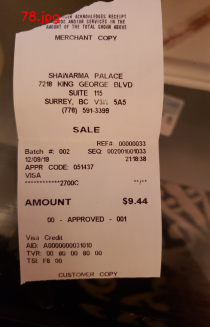

Similar Receipts


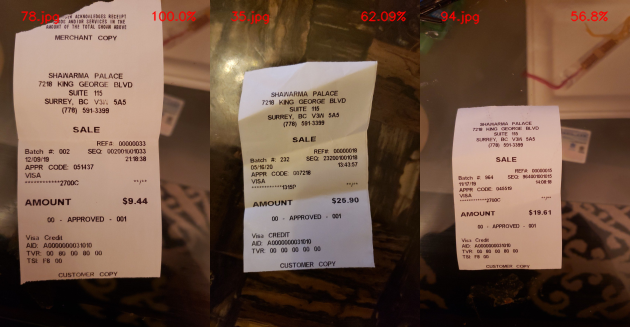

In [ ]:
#finding the similarity of our sample document sample_document against every document in the corpus
#It has to be fixed when there is no match with the filter.

ntest = getIndex('78.jpg')

txtTest = dfnoNA.iloc[ntest]['text']
originalFile = dfnoNA.iloc[ntest]['filename']

nl = printSimilar(originalFile, getSimilarity(txtTest), 0.5)

In [ ]:
# finding similarity for pdf receipt
ntest = getIndex('Jan 30 2021.pdf')

txtTest = dfnoNA.iloc[ntest]['text']
originalFile = dfnoNA.iloc[ntest]['filename']

nl = printSimilar(originalFile, getSimilarity(txtTest), 0.5)


Original PDF Receipt Text: 
1    January 30, 2021\nThanks for ordering, Chinmay...
Name: text, dtype: object
Similar PDF Receipt ID 1 With Score 100.0:
---------------------------------------------------
January 30, 2021
Thanks for ordering, Chinmaya
Here's your receipt for A1 Coffee & Donair.
Total CA$17.95
2 Dinair and Rice CA$14.75
 Choice of Protein  Chicken CA$0.00
 Choice of Ingredients  Lettuce CA$0.00
 Cucumber  CA$0.00  Tomato  CA$0.00
 Onion CA$0.00  Tabbouleh CA$0.00
 Choice of Sauce  Tzatziki Sauce  CA$0.00
 Garlic Sauce  CA$0.00  Extra Sauce
 Hummus Sauce  CA$0.50
Subtotal CA$29.50
Tax CA$1.73
Service Fee CA$2.95
Delivery Fee CA$1.99
Delivery Discount -CA$1.99
Discount -CA$1.48
Promotion -CA$14.75
You ordered from A1 Coffee & Donair
Picked up from
14795 108 Ave, Surrey, BC V3R 1V8, Canada
Delivered to
9838 Whalley Blvd, Surrey, BC V3T 5S8, Canada
---------------------------------------------------
Similar PDF Receipt ID 55 With Score 100.0:
--------------------------------